<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/Tarea_API_JSON_temperatura_humedad_indice_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo-API-JSON-temperatura-humedad-indice-calor

"El índice de calor, o sensación térmica, proporciona información sobre el nivel de calor que se siente... Es una medida de la temperatura del aire en relación con la humedad relativa para un día en particular..."

Tomado de: https://www.cigna.com/es-us/knowledge-center/hw/ndice-de-calor-sth149651

La siguiente celda de código fue compartida en una clase de un bootcamp C8-IA-intermedio de Talento Tech por el campista Julian Valencia:

API JSON de temperatura/humedad/indice de calor que transmite datos cada 30 min

14-sep-2024


In [ ]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php' # URL de la API
respuesta = requests.get(url)
# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
  datos_json = respuesta.json() # Convertir la respuesta a JSON
# Paso 2: Convertir el JSON en un DataFrame de pandas
  dfapi = pd.DataFrame(datos_json)
# Paso 3: Visualizar los primeros registros del dataset
  dfapi.head()
# (Opcional) Guardar el dataset como un archivo CSV
  dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False) # Guardar sin el índice
else:
  print(f"Error en la solicitud: {respuesta.status_code}")
  df1 = pd.read_csv('/content/sample_data/dataset_api_ventusarca.csv')
  df1['fecha'] = pd.to_datetime(df1['fecha'])
  df = df1.drop('id', axis=1)
  df = df.set_index('fecha', inplace=True)

print(datos_json)
print()
print(dfapi)

[{'id': '5337', 'fecha': '2024-10-08 17:48:16', 'temperatura': '20.4', 'humedad': '93', 'heatIndex': '20.92'}, {'id': '5336', 'fecha': '2024-10-08 17:18:15', 'temperatura': '20.6', 'humedad': '93', 'heatIndex': '21.14'}, {'id': '5335', 'fecha': '2024-10-08 16:48:14', 'temperatura': '20.8', 'humedad': '93', 'heatIndex': '21.36'}, {'id': '5334', 'fecha': '2024-10-08 16:18:13', 'temperatura': '21', 'humedad': '94', 'heatIndex': '21.61'}, {'id': '5333', 'fecha': '2024-10-08 15:48:12', 'temperatura': '21.1', 'humedad': '94', 'heatIndex': '21.72'}, {'id': '5332', 'fecha': '2024-10-08 15:18:12', 'temperatura': '22', 'humedad': '95', 'heatIndex': '22.74'}, {'id': '5331', 'fecha': '2024-10-08 14:48:11', 'temperatura': '22.1', 'humedad': '95', 'heatIndex': '22.85'}, {'id': '5330', 'fecha': '2024-10-08 14:30:16', 'temperatura': '22.8', 'humedad': '95', 'heatIndex': '23.62'}, {'id': '5329', 'fecha': '2024-10-08 14:00:15', 'temperatura': '23', 'humedad': '92', 'heatIndex': '23.76'}, {'id': '5328', 

# Desde aquí empieza la propuesta hecha por el ejecutor técnico de Talento Tech en bootcamps de IA, Andrés Felipe Escallón Portilla:

In [ ]:
# Visualizando (mejor que usando print) los datos en formato json (estilo diccionario de Python)
datos_json

[{'id': '5337',
  'fecha': '2024-10-08 17:48:16',
  'temperatura': '20.4',
  'humedad': '93',
  'heatIndex': '20.92'},
 {'id': '5336',
  'fecha': '2024-10-08 17:18:15',
  'temperatura': '20.6',
  'humedad': '93',
  'heatIndex': '21.14'},
 {'id': '5335',
  'fecha': '2024-10-08 16:48:14',
  'temperatura': '20.8',
  'humedad': '93',
  'heatIndex': '21.36'},
 {'id': '5334',
  'fecha': '2024-10-08 16:18:13',
  'temperatura': '21',
  'humedad': '94',
  'heatIndex': '21.61'},
 {'id': '5333',
  'fecha': '2024-10-08 15:48:12',
  'temperatura': '21.1',
  'humedad': '94',
  'heatIndex': '21.72'},
 {'id': '5332',
  'fecha': '2024-10-08 15:18:12',
  'temperatura': '22',
  'humedad': '95',
  'heatIndex': '22.74'},
 {'id': '5331',
  'fecha': '2024-10-08 14:48:11',
  'temperatura': '22.1',
  'humedad': '95',
  'heatIndex': '22.85'},
 {'id': '5330',
  'fecha': '2024-10-08 14:30:16',
  'temperatura': '22.8',
  'humedad': '95',
  'heatIndex': '23.62'},
 {'id': '5329',
  'fecha': '2024-10-08 14:00:15',
  

In [ ]:
# Visualizando (mejor que usando print) los datos en formato de dataframe
dfapi

,id,fecha,temperatura,humedad,heatIndex
0,5337,2024-10-08 17:48:16,20.4,93,20.92
1,5336,2024-10-08 17:18:15,20.6,93,21.14
2,5335,2024-10-08 16:48:14,20.8,93,21.36
3,5334,2024-10-08 16:18:13,21,94,21.61
4,5333,2024-10-08 15:48:12,21.1,94,21.72
...,...,...,...,...,...
5332,5,2024-06-13 20:38:03,24.4,73,24.8
5333,4,2024-06-13 20:08:02,24.2,75,24.63
5334,3,2024-06-13 19:38:01,23.4,78,23.83
5335,2,2024-06-13 19:08:01,23.9,76,24.33


# Actividad:

1. Hacer un EDA al dataframe anterior
2. Explorar los tres íconos de Google Colab cuando se muestra el dataframe y mostrar los resultados


# Usando Gemini:

- Prompt:

¿Cómo se calcula el índice de calor (sensación tyérmica) basado en la temperatura y humedad?

- Respuesta (fuera de este ipynb):


## Cómo se Calcula el Índice de Calor (Sensación Térmica)

**El índice de calor** es una medida que combina la temperatura del aire y la humedad relativa para determinar cómo se siente realmente el calor en la piel humana. Es decir, te indica la sensación térmica que experimentamos, ya que la humedad hace que el sudor se evapore más lentamente, aumentando la sensación de calor.

### ¿Cómo se calcula?
El cálculo exacto del índice de calor requiere de fórmulas matemáticas complejas que involucran variables como la temperatura del bulbo seco (temperatura del aire), la temperatura del bulbo húmedo (relacionada con la humedad) y la presión atmosférica.

**Sin embargo, para un uso general**, existen tablas y calculadoras en línea que te permiten obtener una estimación del índice de calor simplemente introduciendo la temperatura y la humedad relativa.

**Ejemplo de una tabla simplificada:**

| Temperatura (°C) | Humedad Relativa (%) | Índice de Calor (°C) | Sensación |
|---|---|---|---|
| 32 | 70 | 38 | Calor incómodo |
| 35 | 80 | 42 | Muy caluroso |
| 40 | 90 | 50 | Extremo calor |

**Importante:** Los valores exactos pueden variar ligeramente según la fuente y los métodos de cálculo utilizados.

### ¿Por qué es importante el índice de calor?
* **Salud:** Ayuda a prevenir enfermedades relacionadas con el calor, como el golpe de calor.
* **Actividades al aire libre:** Permite planificar actividades al aire libre de manera segura, especialmente para personas mayores, niños y personas con enfermedades crónicas.
* **Agricultura:** Influye en el crecimiento de las plantas y en la producción agrícola.
* **Meteorología:** Es un parámetro importante en los pronósticos meteorológicos.

### ¿Dónde encontrar información sobre el índice de calor?
* **Servicios meteorológicos:** La mayoría de los servicios meteorológicos nacionales proporcionan información sobre el índice de calor en sus sitios web y aplicaciones móviles.
* **Aplicaciones móviles:** Existen numerosas aplicaciones meteorológicas que incluyen el índice de calor en sus pronósticos.
* **Noticias locales:** Los medios de comunicación suelen informar sobre el índice de calor durante las olas de calor.

**En resumen,** el índice de calor es una herramienta útil para evaluar las condiciones climáticas y tomar medidas para proteger nuestra salud. Al conocer este valor, podemos tomar decisiones informadas sobre nuestras actividades al aire libre y prevenir problemas de salud relacionados con el calor.

**¿Quieres que te ayude a encontrar una calculadora de índice de calor en línea o te proporcione más información sobre este tema?**

**Palabras clave:** índice de calor, sensación térmica, temperatura, humedad, golpe de calor, meteorología, salud.


- Respuesta (prompt usado dentro de este ipynb después de haber ejecutado todas las celdas):

El índice de calor no se puede calcular directamente usando solo la temperatura y la humedad en el conjunto de datos que proporcionaste.

El conjunto de datos ya incluye una columna llamada ic que representa el índice de calor. Si deseas calcular el índice de calor para otros valores de temperatura y humedad, necesitarías usar una fórmula o un modelo de regresión.

Puedo ayudarte a crear un modelo de regresión para estimar el índice de calor basado en la temperatura y la humedad si lo deseas.

Fuentes
www.wpc.ncep.noaa.gov/html/heatindex.shtml
www.calculator.net/heat-index-calculator.html
www.weather.gov/ama/heatindex
www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
www.omnicalculator.com/physics/heat-index


# TAREA (intentar terminarla para las siguiente clase):

1. Hacer regresión múltiple, **también regresión polinómica (variando el grado: 1, 2, 3, 4, 5, etc...)  y logarítmica ( variable: logX, consultar)** para estimar el índice de calor (sensación térmica cuantitativa) en función de la temperatura y/o humedad (**con solo la temperatura, con solo la humedad, y con ambas**).

2. Crear una columna que se llame sensación térmica para describirla cualitativamente en 5 categorías (muy baja, baja, media, alta, muy alta).

3. Con lo anterior, investigar cómo se puede estimar la categoría de la sensación térmica usando regresión logística (la cual es usada para clasificación) en dos escenarios: A) Solo teniendo en cuenta la variable índice de calor, y B) teniendo en cuenta tres variables: temperatura, humedad e índice de calor.

4. Graficar las siguientes series temporales:

- Temperatura vs Fecha
- Humedad vs Fecha
- Índice de calor vs Fecha
- Sensación térmica vs Fecha

In [ ]:
print(dfapi.columns)


Index(['id', 'fecha', 'temperatura', 'humedad', 'heatIndex'], dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [ ]:
# Ya tienes el df cargado
# Asegúrate de que la columna 'fecha' esté en formato de fecha
dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])


dfapi.head()

,id,fecha,temperatura,humedad,heatIndex
0,5337,2024-10-08 17:48:16,20.4,93,20.92
1,5336,2024-10-08 17:18:15,20.6,93,21.14
2,5335,2024-10-08 16:48:14,20.8,93,21.36
3,5334,2024-10-08 16:18:13,21,94,21.61
4,5333,2024-10-08 15:48:12,21.1,94,21.72


In [ ]:
# Definir las categorías basadas en el índice de calor
def clasificar_sensacion_termica(ic):
    if ic < '20':
        return 'Muy baja'
    elif '20' <= ic < '30':
        return 'Baja'
    elif '30' <= ic < '40':
        return 'Media'
    elif '40' <= ic < '50':
        return 'Alta'
    else:
        return 'Muy alta'

# Aplicar la función al DataFrame
dfapi['sensacion_termica'] = dfapi['heatIndex'].apply(clasificar_sensacion_termica)
dfapi.head()

,id,fecha,temperatura,humedad,heatIndex,sensacion_termica
0,5337,2024-10-08 17:48:16,20.4,93,20.92,Baja
1,5336,2024-10-08 17:18:15,20.6,93,21.14,Baja
2,5335,2024-10-08 16:48:14,20.8,93,21.36,Baja
3,5334,2024-10-08 16:18:13,21,94,21.61,Baja
4,5333,2024-10-08 15:48:12,21.1,94,21.72,Baja


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Variables independientes (temperatura y humedad)
X = dfapi[['temperatura', 'humedad']]
# Variable dependiente (índice de calor)
y = dfapi['heatIndex']

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión lineal múltiple
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lineal = modelo_lineal.predict(X_test)
error_lineal = mean_squared_error(y_test, y_pred_lineal)

print(f'Error cuadrático medio (Regresión Lineal): {error_lineal}')

# Regresión polinómica (probando varios grados)
for grado in range(1, 6):
    poly = PolynomialFeatures(degree=grado)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    modelo_poli = LinearRegression()
    modelo_poli.fit(X_poly_train, y_train)

    y_pred_poli = modelo_poli.predict(X_poly_test)
    error_poli = mean_squared_error(y_test, y_pred_poli)

    print(f'Grado {grado} - Error cuadrático medio (Regresión Polinómica): {error_poli}')

Error cuadrático medio (Regresión Lineal): 0.002057833408949108
Grado 1 - Error cuadrático medio (Regresión Polinómica): 0.0020578334089492735
Grado 2 - Error cuadrático medio (Regresión Polinómica): 0.002004792890368138
Grado 3 - Error cuadrático medio (Regresión Polinómica): 0.0017353923193805809
Grado 4 - Error cuadrático medio (Regresión Polinómica): 0.0013266658949435978
Grado 5 - Error cuadrático medio (Regresión Polinómica): 0.0010461854694304629


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Convertir la columna de 'sensacion_termica' en valores numéricos
le = LabelEncoder()
dfapi['sensacion_termica_num'] = le.fit_transform(dfapi['sensacion_termica'])

# Escenario A: Solo usando el índice de calor
X_ic = dfapi[['heatIndex']]
y_sensacion = dfapi['sensacion_termica_num']

X_ic_train, X_ic_test, y_sensacion_train, y_sensacion_test = train_test_split(X_ic, y_sensacion, test_size=0.2, random_state=42)

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_ic_train, y_sensacion_train)

y_pred_logico_ic = modelo_logistico.predict(X_ic_test)
accuracy_ic = accuracy_score(y_sensacion_test, y_pred_logico_ic)

print(f'Precisión (Solo Índice de Calor): {accuracy_ic}')

# Escenario B: Usando temperatura, humedad e índice de calor
X_th_ic = dfapi[['temperatura', 'humedad', 'heatIndex']]

X_th_ic_train, X_th_ic_test, y_sensacion_train, y_sensacion_test = train_test_split(X_th_ic, y_sensacion, test_size=0.2, random_state=42)

modelo_logistico.fit(X_th_ic_train, y_sensacion_train)

y_pred_logico_th_ic = modelo_logistico.predict(X_th_ic_test)
accuracy_th_ic = accuracy_score(y_sensacion_test, y_pred_logico_th_ic)

print(f'Precisión (Temperatura, Humedad, Índice de Calor): {accuracy_th_ic}')

Precisión (Solo Índice de Calor): 1.0
Precisión (Temperatura, Humedad, Índice de Calor): 0.9971910112359551


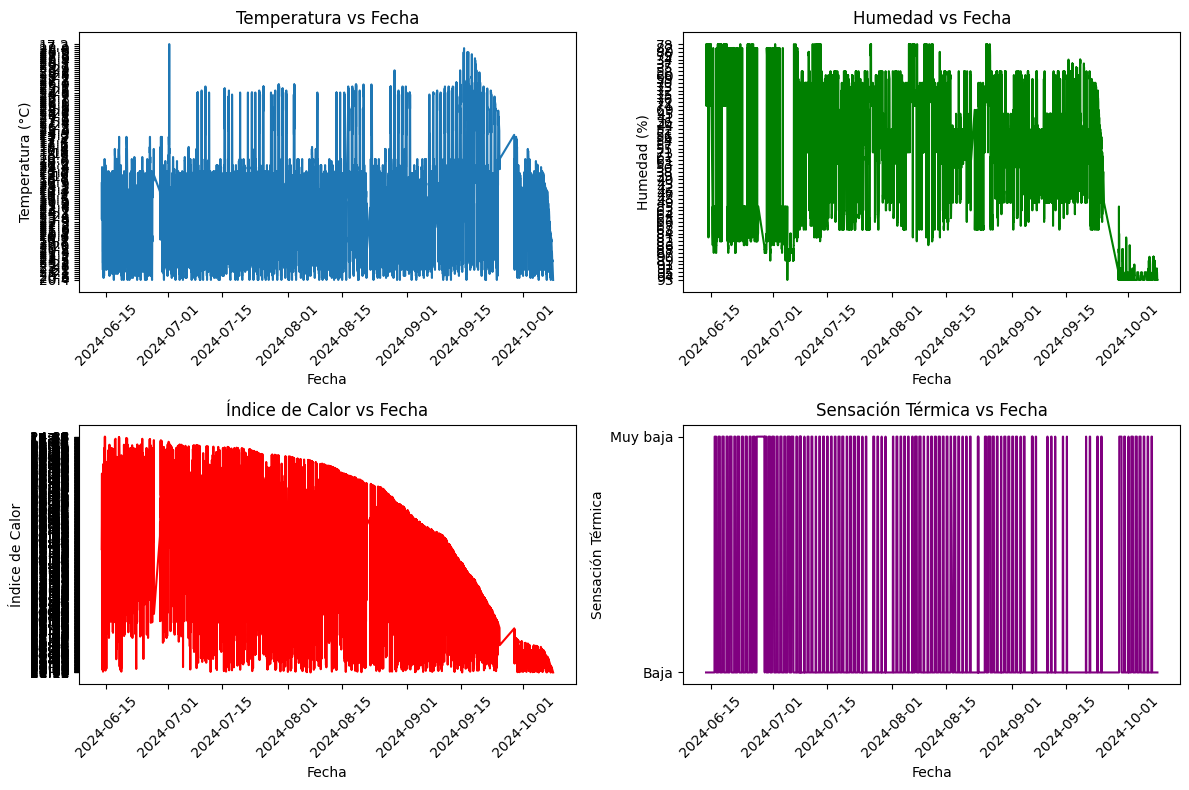

In [ ]:
# Graficar las series temporales
plt.figure(figsize=(12, 8))

# Gráfico de Temperatura vs Fecha
plt.subplot(2, 2, 1)
plt.plot(dfapi['fecha'], dfapi['temperatura'], label='Temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura vs Fecha')
plt.xticks(rotation=45)

# Gráfico de Humedad vs Fecha
plt.subplot(2, 2, 2)
plt.plot(dfapi['fecha'], dfapi['humedad'], label='Humedad', color='green')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.title('Humedad vs Fecha')
plt.xticks(rotation=45)

# Gráfico de Índice de Calor vs Fecha
plt.subplot(2, 2, 3)
plt.plot(dfapi['fecha'], dfapi['heatIndex'], label='Índice de Calor', color='red')
plt.xlabel('Fecha')
plt.ylabel('Índice de Calor')
plt.title('Índice de Calor vs Fecha')
plt.xticks(rotation=45)

# Gráfico de Sensación Térmica vs Fecha
plt.subplot(2, 2, 4)
plt.plot(dfapi['fecha'], dfapi['sensacion_termica'], label='Sensación Térmica', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Sensación Térmica')
plt.title('Sensación Térmica vs Fecha')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
dfapi[['temperatura', 'humedad', 'heatIndex']] = dfapi[['temperatura', 'humedad', 'heatIndex']].apply(pd.to_numeric, errors='coerce')
dfapi = dfapi.dropna()

correlation_matrix = dfapi[['temperatura', 'humedad']].corr()
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
             temperatura   humedad
temperatura     1.000000 -0.520326
humedad        -0.520326  1.000000


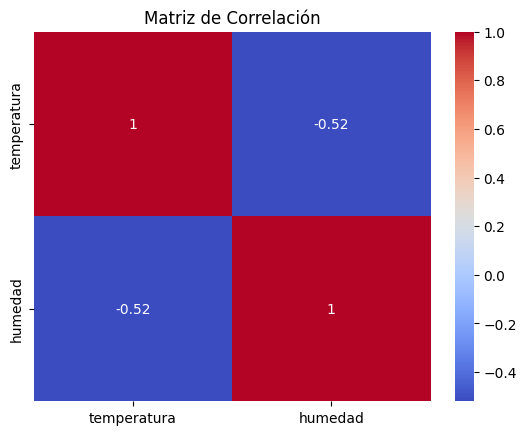

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns

# Mapa de calor de la correlación (Se usa para variables numéricas)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()